In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
T = 3600  # s
time = np.linspace(0, 30*T, 300)

In [168]:
phi = 10*np.sin( 2*np.pi/T*time ) 
phi += 10*np.sin( 2*np.pi/(8*T)*time )
phi = phi - np.mean( phi )

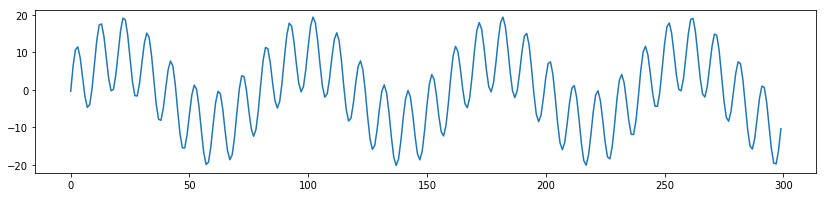

In [169]:
plt.figure( figsize=(14, 3) )
plt.plot( phi );

In [175]:
# Wall
k = 1.2  # W/m/K
rhoCp = 1000e3 # J/m3/K
L = 0.2 # m

In [176]:
dt = np.diff( time ).mean()
alpha = k/rhoCp

In [177]:
print('epaisseur caractériqtique: %.2f m'% ( np.sqrt( alpha*T ) ))

epaisseur caractériqtique: 0.07 m


In [178]:
def modelTF(  ):

    
    TF_phi = np.fft.rfft( phi  )
    freq = np.fft.rfftfreq( phi.size, d= dt )
    iw = 2j*np.pi*freq
    
    
    # inertie mur 
    expL = np.exp( -(1+1j)*np.sqrt( 4*np.pi*freq/alpha  )*L )
    E = (1-expL)/(1+expL)
    
    A = E*(1+1j)*np.sqrt( np.pi*freq/alpha  )
    
    # modele
    source = TF_phi
    divide =  A
    
    TF_theo  = np.zeros_like( TF_phi )
    TF_theo[ np.abs(A) > 0] = TF_phi[ np.abs(A) > 0]/A[ np.abs(A) > 0]

    # TF inverse
    T_theo = np.fft.irfft( TF_theo , n=phi.size )
    
    return T_theo

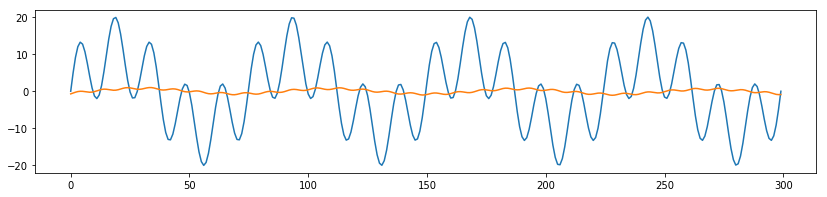

In [179]:
plt.figure( figsize=(14, 3) )
plt.plot( Ti );
plt.plot( modelTF( ) )